# Blockly Trial Map Generator

In this notebook, we will generate trial maps for the experiment

In [7]:
import numpy as np
import sys
sys.path.append("../src/") # go to source dir


In [8]:
from level import showLevelWithAgentPNG, showLevelPNGMark
from trial import Trial


In [9]:
trial = Trial(map_size = 3, num_agents = 3)
trial.generate_map(method='eller', xskew = 0.1, yskew= 0.9)
# trial.generate_map(method='cellular', complexity=0.2, density=0.9)
# trial.generate_map(mutation=True)
trial

Trial(id=1, map_size=3, num_agents=3, score=0)

In [10]:
from random import choices
ran_st = choices([False, True], [0.7, 0.3], k=1)
ran_ed = choices([False, True], [0.7, 0.3], k=1)
trial.start_agent_walk(random_start=False)

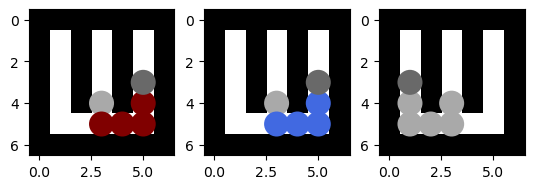

In [11]:
trial.show_map_with_agents()

In [12]:
trial.to_json()

'{"id": 1, "map_size": 3, "num_agents": 3, "score": 0, "_Trial__grid": [{"size": 3}], "agents": [{"id": 1, "grid": {"size": 3}, "curr_direction": [-1, 0], "path": [[{"row": 4, "col": 3, "value": 0, "code_block": "turn_right#move_forward"}, {"row": 5, "col": 3, "value": 0, "code_block": "move_forward"}, {"row": 5, "col": 4, "value": 0, "code_block": "turn_left#move_forward"}, {"row": 5, "col": 5, "value": 0, "code_block": "move_forward"}, {"row": 4, "col": 5, "value": 0, "code_block": "turn_left#move_forward"}, {"row": 3, "col": 5, "value": 0, "code_block": "move_forward"}]]}, {"id": 2, "grid": {"size": 3}, "curr_direction": [-1, 0], "path": [[{"row": 4, "col": 3, "value": 0, "code_block": "turn_right#move_forward"}, {"row": 5, "col": 3, "value": 0, "code_block": "move_forward"}, {"row": 5, "col": 4, "value": 0, "code_block": "turn_left#move_forward"}, {"row": 5, "col": 5, "value": 0, "code_block": "move_forward"}, {"row": 4, "col": 5, "value": 0, "code_block": "turn_left#move_forward"}